
# Customizing Seaborn Plots
> In this final chapter, you will learn how to add informative plot titles and axis labels, which are one of the most important parts of any data visualization! You will also learn how to customize the style of your visualizations in order to more quickly orient your audience to the key takeaways. Then, you will put everything you have learned together for the final exercises of the course! This is the Summary of lecture "Introduction to Data Visualization with Seaborn", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Changing plot style and color
- Why customize?
    - Reasons to change style:
        - Personal preference
        - Improve readability
        - Guide interpretation

### Changing style and palette
et's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.

In [14]:
survey_data = pd.read_csv('./dataset/young-people-survey-responses.csv', index_col=0)
survey_data.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False


In [15]:
survey_data['Parents\' advice'] = survey_data['Parents\' advice'].map({1:'Never', 
                                                                       2:'Rarely', 
                                                                       3:'Sometimes', 
                                                                       4:'Often', 
                                                                       5:'Always'})

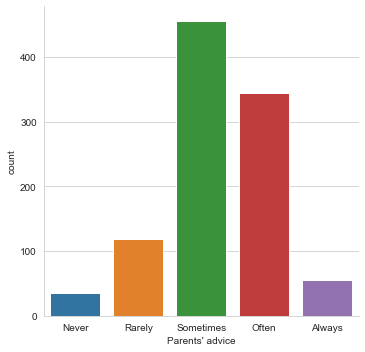

In [16]:
# Set the style to "whitegrid"
sns.set_style('whitegrid')

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x='Parents\' advice', 
            data=survey_data, 
            kind="count", 
            order=category_order);

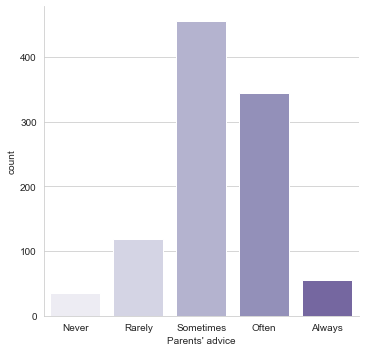

In [18]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette('Purples')

sns.catplot(x='Parents\' advice', 
            data=survey_data, 
            kind="count", 
            order=category_order);

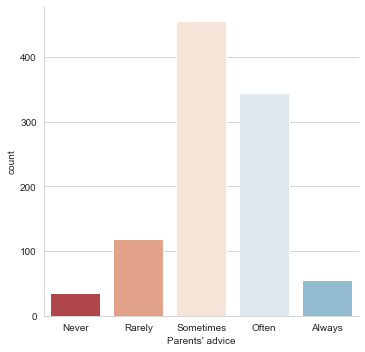

In [19]:
# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

sns.catplot(x='Parents\' advice', 
            data=survey_data, 
            kind="count", 
            order=category_order);

This style and diverging color palette best highlights the difference between the number of young people who usually listen to their parents' advice versus those who don't.

### Changing the scale
In this exercise, we'll continue to look at the dataset containing responses from a survey of young people. Does the percentage of people reporting that they feel lonely vary depending on how many siblings they have? Let's find out using a bar plot, while also exploring Seaborn's four different plot scales ("contexts").

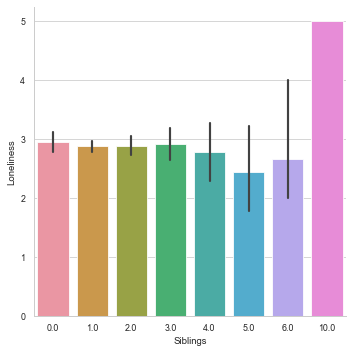

In [21]:
# Set the context to "paper"
sns.set_context('paper')

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar");

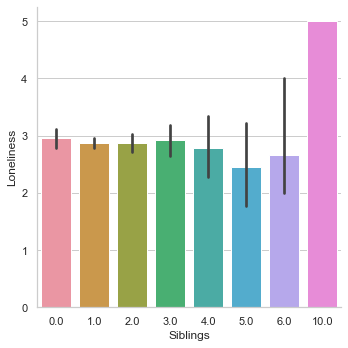

In [23]:
# Change the context to "notebook"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar");

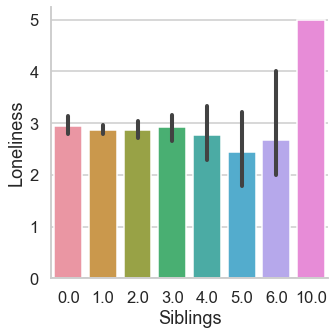

In [24]:
# Change the context to "talk"
sns.set_context("talk")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar");

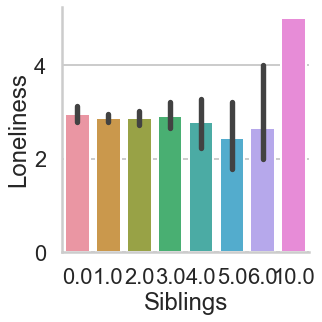

In [25]:
# Change the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar");

Each context name gives Seaborn's suggestion on when to use a given plot scale (in a paper, in an iPython notebook, in a talk/presentation, or in a poster session).

### Using a custom palette
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

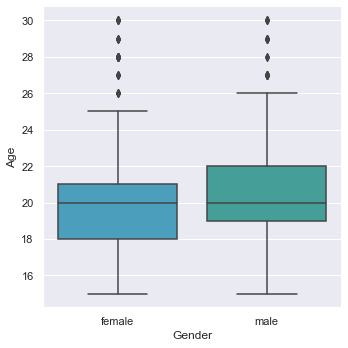

In [27]:
# Change the context to "notebook"
sns.set_context("notebook")

# Set the style to "darkgrid"
sns.set_style('darkgrid')

# Set a custom color palette
sns.set_palette(['#39A7D0', '#36ADA4'])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box");

 It looks like the median age is the same for males and females, but distribution of females skews younger than the males.

## Adding titles and labels: Part 1


### FacetGrids vs. AxesSubplots
In the recent lesson, we learned that Seaborn plot functions create two different types of objects: `FacetGrid` objects and `AxesSubplot` objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name `g`. Let's identify which type of object it is.

In [29]:
mpg = pd.read_csv('./dataset/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<class 'seaborn.axisgrid.FacetGrid'>


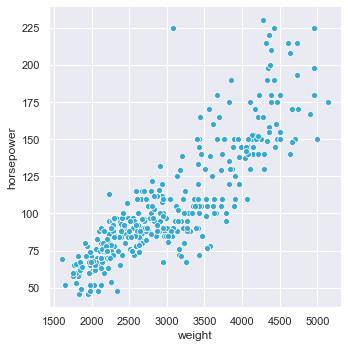

In [31]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter");

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

### Adding a title to a FacetGrid object
In the previous exercise, we used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a `FacetGrid` object. Now that we know what type of object it is, let's add a title to this plot.

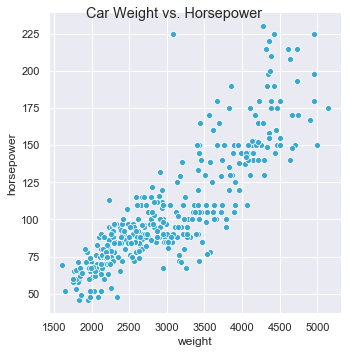

In [33]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter");

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle('Car Weight vs. Horsepower');

 It looks like a car's weight is positively correlated with its horsepower.

## Adding titles and labels: Part 2


### Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the `lineplot()` function. Note that `lineplot()` does not support the creation of subplots, so it returns an `AxesSubplot` object instead of an `FacetGrid` object.

In [36]:
mpg_mean = pd.read_csv('./dataset/mpg_mean.csv', index_col=0)

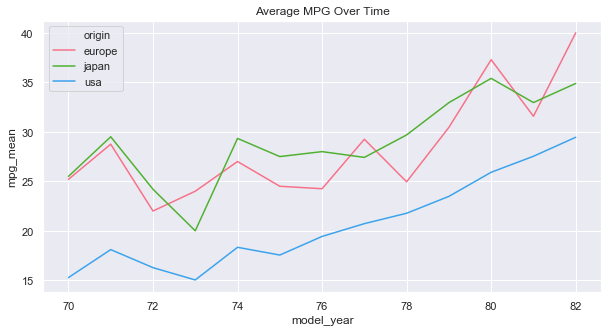

In [37]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin");

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time");

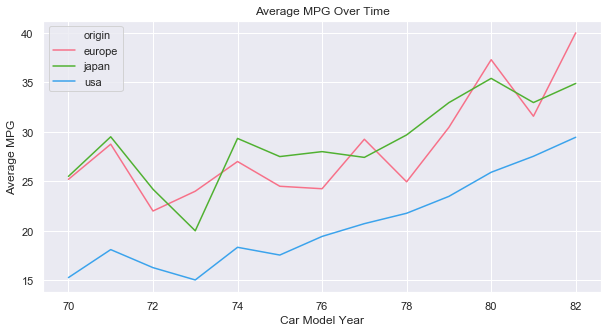

In [38]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin");

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time");

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year",
      ylabel="Average MPG");

The average miles per gallon achieved is increasing over time for all three places of origin, but the USA is always lower than Europe and Japan.

### Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

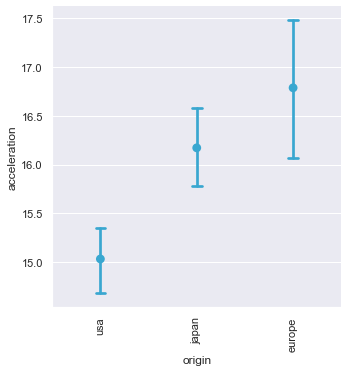

In [39]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1);

# Rotate x-tick labels
plt.xticks(rotation=90);

Since higher values indicate slower acceleration, it looks like cars from Japan and Europe have significantly slower acceleration compares to the USA.

## Putting it all together


### Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

In [43]:
survey_data['Interested in Pets'] = survey_data['Pets'].apply(lambda x: 'Yes' if x >= 4.0 else 'No')

Text(0.5, 0.98, 'Age of Those Interested in Pets vs. Not')

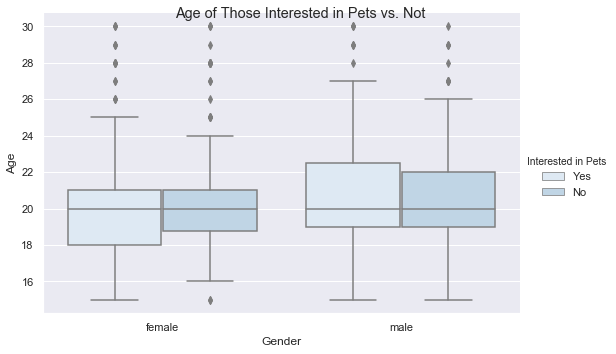

In [46]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Interested in Pets', aspect=1.5)

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

After controlling for gender, it looks like the age distributions of people who are interested in pets are similar than those who aren't.

### Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music ("Likes Techno") varies by their gender ("Gender") or where they live ("Village - town"). This exercise will give us an opportunity to practice the many things we've learned throughout this course!



In [49]:
survey_data['Likes Techno'] = survey_data['Techno'].apply(lambda x: True if x >= 4.0 else False)

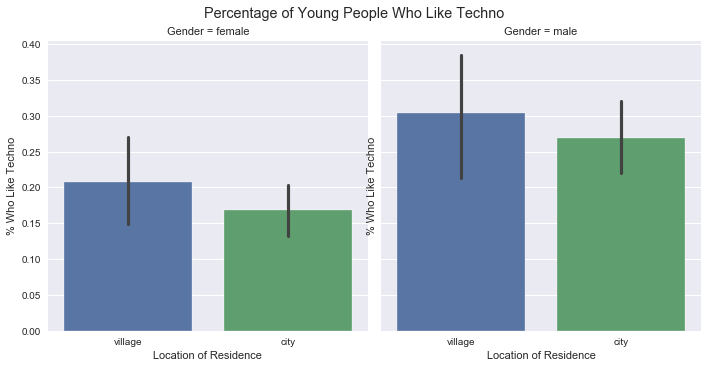

In [54]:
# Set the figure style to "dark"
plt.style.use('seaborn')

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col='Gender');

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02);
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno");